In [1]:
#Business Understanding
#Chances of admission into top graduate schools are highly affected by various factors like GRE, University Rating, SOP, LOR, TOEFL, CGPA and Research. 
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Read CSV Data 
train_df = pd.read_csv("Admission_Predict.csv",sep = ",")
train_df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
#Data Understanding
#we can clearly understand the data columns and types of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
train_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
#Data Preparing
#Null Values if there are need to replaced with null values
#Here we can observe there are no null values found
train_df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
#What are the top 100 students with highest number of TOEFL Scores ?
def score_with_highestchanceofadmit(score):
    
    TOEFL_Score = train_df.sort_values(by = [score], ascending=True)
    TOEFL_Score.head(100)
    return TOEFL_Score


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
368,369,298,92,1,2.0,2.0,7.88,0,0.51
79,80,294,93,1,1.5,2.0,7.36,0,0.46
28,29,295,93,1,2.0,2.0,7.20,0,0.46
347,348,299,94,1,1.0,1.0,7.34,0,0.42
272,273,294,95,1,1.5,1.5,7.64,0,0.49
78,79,296,95,2,3.0,2.0,7.54,1,0.44
271,272,299,96,2,1.5,2.0,7.86,0,0.54
344,345,295,96,2,1.5,2.0,7.34,0,0.47
329,330,297,96,2,2.5,1.5,7.89,0,0.43
376,377,297,96,2,2.5,2.0,7.43,0,0.34


In [12]:
#What are the top 100 students with highest number of GRE ?
def score_with_highestchanceofadmits(score):
    
    GRE_Scores = train_df.sort_values(by = [score], ascending=True)
    GRE_Scores.head(100)
    
    return GRE_Scores

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
117,118,290,104,4,2.0,2.5,7.46,0,0.45
377,378,290,100,1,1.5,2.0,7.56,0,0.47
168,169,293,97,2,2.0,4.0,7.80,1,0.64
272,273,294,95,1,1.5,1.5,7.64,0,0.49
79,80,294,93,1,1.5,2.0,7.36,0,0.46
28,29,295,93,1,2.0,2.0,7.20,0,0.46
205,206,295,99,2,2.5,3.0,7.65,0,0.57
344,345,295,96,2,1.5,2.0,7.34,0,0.47
327,328,295,101,2,2.5,2.0,7.86,0,0.69
388,389,296,97,2,1.5,2.0,7.80,0,0.49


[Text(0, 0, '0.92'),
 Text(0, 0, '0.76'),
 Text(0, 0, '0.72'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0.65'),
 Text(0, 0, '0.9'),
 Text(0, 0, '0.75'),
 Text(0, 0, '0.68'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.45')]

<Figure size 864x576 with 0 Axes>

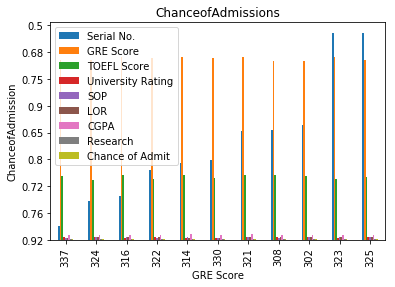

In [57]:
#GRE SCORES that have highest chances of admission
def plot1():
    plt.figure(figsize=(12,8))
    ax = train_df[train_df['Chance of Admit ']>0.95].plot(kind = 'bar')
    ax.set_title('ChanceofAdmissions')
    ax.set_xlabel('GRE Score')
    ax.set_ylabel('ChanceofAdmission')
    ax.set_xticklabels(train_df['GRE Score'])
    ax.set_yticklabels(train_df['Chance of Admit '])

[Text(0, 0, '0.45'),
 Text(0, 0, '0.47'),
 Text(0, 0, '0.64'),
 Text(0, 0, '0.49'),
 Text(0, 0, '0.46'),
 Text(0, 0, '0.46'),
 Text(0, 0, '0.57'),
 Text(0, 0, '0.47'),
 Text(0, 0, '0.69'),
 Text(0, 0, '0.49')]

<Figure size 864x576 with 0 Axes>

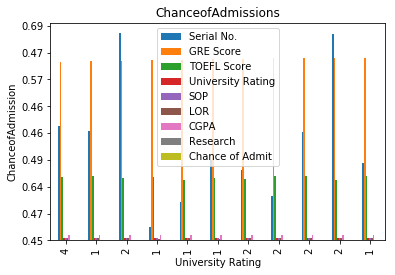

In [10]:
#University Rating that have highest chances of admission
def plt2:    
    plt.figure(figsize=(12,8))
    ax = train_df[train_df['Chance of Admit ']>0.95].plot(kind = 'bar')
    ax.set_title('ChanceofAdmissions')
    ax.set_xlabel('University Rating')
    ax.set_ylabel('ChanceofAdmission')
    ax.set_xticklabels(train_df['University Rating'])
    ax.set_yticklabels(train_df['Chance of Admit '])

In [55]:
train_df[train_df['Chance of Admit ']>0.95]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
24,25,336,119,5,4.0,3.5,9.80,1,0.97
71,72,336,112,5,5.0,5.0,9.76,1,0.96
81,82,340,120,4,5.0,5.0,9.50,1,0.96
130,131,339,114,5,4.0,4.5,9.76,1,0.96
143,144,340,120,4,4.5,4.0,9.92,1,0.97
148,149,339,116,4,4.0,3.5,9.80,1,0.96
202,203,340,120,5,4.5,4.5,9.91,1,0.97
203,204,334,120,5,4.0,5.0,9.87,1,0.97
213,214,333,119,5,5.0,4.5,9.78,1,0.96
384,385,340,113,4,5.0,5.0,9.74,1,0.96


In [ ]:
score_with_highestchanceofadmit('GRE Score')
score_with_highestchanceofadmits('TOEFL Score')



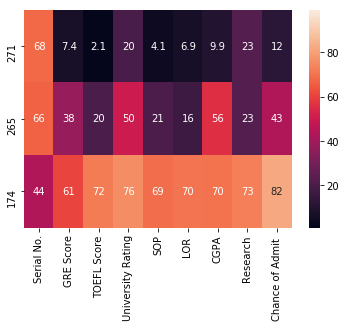

In [18]:
#Rank Chance of Admit based on percentiles of GRE Score,CGPA,TOEL SCORE,SOP,LOR,RESEARCH
import seaborn as sns
indices = [32, 150, 245]
percentiles = train_df.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)




In [2]:
#Model Preparing
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, 8].values
#Removing Serial
X = X[:, 1:]
#Split the Dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Fitting LinearRegression to Training Set
from sklearn.linear_model import LinearRegression
linearregressor = LinearRegression()
linearregressor.fit(X_train, y_train)

#predicting with Test Set
y_pred = linearregressor.predict(X_test)

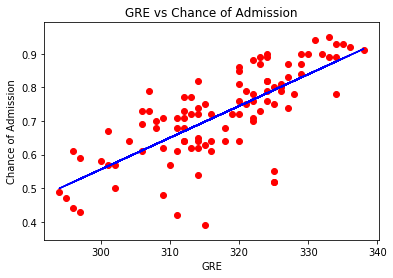

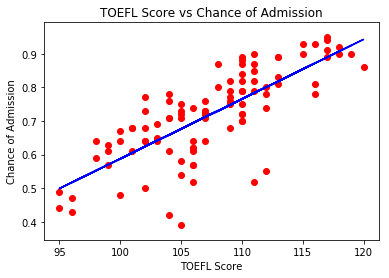

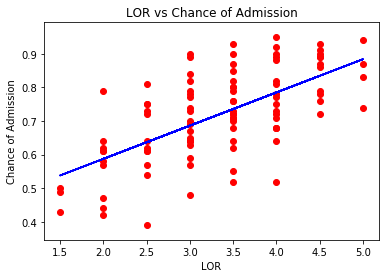

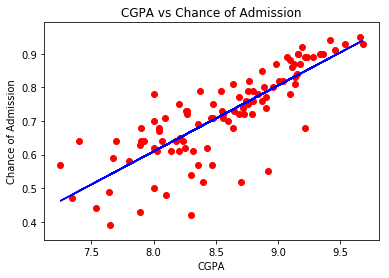

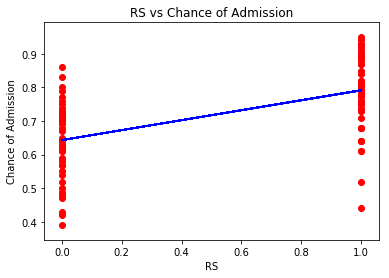

In [3]:
#Fitting LinearRegression to Training Set
from sklearn.linear_model import LinearRegression
linearregressor = LinearRegression()
lienarregressor.fit(X_train, y_train)

#predicting with Test Set
y_pred = linearregressor.predict(X_test)


#Building The Optimal Model With BackWard Elimination, Eliminating Columns With P-Value > 0.06
import statsmodels.regression.linear_model as sm
X = np.append(arr = np.ones((400,1)).astype(int), values = X, axis = 1)
linearX_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7]]
linearregressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
linearregressor_OLS.summary()
X_opt = X[:, [0, 1, 2, 3, 5, 6, 7]]
linearregressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
lienarregressor_OLS.summary()
X_opt = X[:, [0, 1, 2, 5, 6, 7]]
linearregressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
linearregressor_OLS.summary()


#Predicting with the optimal Model
X_trainOPT, X_testOPT, y_trainOPT, y_testOPT = train_test_split(X_opt, y, test_size = 0.25, random_state = 0)
linearregressorOPT = LinearRegression()
linearregressorOPT.fit(X_trainOPT, y_trainOPT)

y_predOPT = linearregressorOPT.predict(X_testOPT)


#Plotting Each Independet Variable with the Dependent One




#GRE
XGRE = X_testOPT[:, 1]
XGRE = X_GRE.reshape(-1,1)
linearregressorGRE = LinearRegression()
linearregressorGRE.fit(XGRE, ytestOPT)


plt.scatter(XGRE, ytestOPT, color = 'red')
plt.plot(XGRE, regressorGRE.predict(XGRE), color = 'blue')
plt.title('GRE vs Chance of Admission')
plt.xlabel('GRE')
plt.ylabel('Chance of Admission')
plt.show()

#TOEFL SCORE
XTOEFL = XtestOPT[:, 2]
XTOEFL = XTOEFL.reshape(-1,1)
linearregressorTOEFL = LinearRegression()
linearregressorTOEFL.fit(XTOEFL, ytestOPT)


plt.scatter(XTOEFL, ytestOPT, color = 'red')
plt.plot(X_TOEFL, regressorTOEFL.predict(X_TOEFL), color = 'blue')
plt.title('TOEFL Score vs Chance of Admission')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admission')
plt.show()

#LOR
XLOR = XtestOPT[:, 3]
XLOR = XLOR.reshape(-1,1)
linearregressorLOR = LinearRegression()
linearregressorLOR.fit(XLOR, ytestOPT)


plt.scatter(XLOR, ytestOPT, color = 'red')
plt.plot(XLOR, regressorLOR.predict(XLOR), color = 'blue')
plt.title('LOR vs Chance of Admission')
plt.xlabel('LOR')
plt.ylabel('Chance of Admission')
plt.show()

#CGPA
XCGPA = XtestOPT[:, 4]
XCGPA = XCGPA.reshape(-1,1)
linearregressorCGPA = LinearRegression()
linearregressorCGPA.fit(XCGPA, ytestOPT)


plt.scatter(XCGPA, ytestOPT, color = 'red')
plt.plot(XCGPA, regressorCGPA.predict(XCGPA), color = 'blue')
plt.title('CGPA vs Chance of Admission')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admission')
plt.show()

#Research as RS
X_RS = XtestOPT[:, 5]
X_RS = XRS.reshape(-1,1)
linearregressorRS = LinearRegression()
linearregressorRS.fit(XRS, ytestOPT)

#Evaluating Results
plt.scatter(XRS, ytestOPT, color = 'red')
plt.plot(XRS, regressorRS.predict(XRS), color = 'blue')
plt.title('RS vs Chance of Admission')
plt.xlabel('RS')
plt.ylabel('Chance of Admission')
plt.show()
